[View in Colaboratory](https://colab.research.google.com/github/nicolasmetallo/simple-nlp-analysis-with-spacy/blob/master/simple_analysis_macri_latest_speech.ipynb)

## Install Pre-requisites & Libraries

In [1]:
#!pip install spacy
#!python -m spacy download es_core_news_sm

    100% |████████████████████████████████| 22.0MB 1.3MB/s 
    100% |████████████████████████████████| 122kB 14.1MB/s 
    100% |████████████████████████████████| 1.2MB 13.7MB/s 
    100% |████████████████████████████████| 194kB 19.7MB/s 
    100% |████████████████████████████████| 153kB 22.1MB/s 
    100% |████████████████████████████████| 604kB 14.5MB/s 
    100% |████████████████████████████████| 317kB 17.2MB/s 
    100% |████████████████████████████████| 450kB 17.4MB/s 
  Running setup.py bdist_wheel for spacy ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/60/0b/bb/7c2e28db574dbb2358176934eddd32a1c5f838ba0bc23eaaab
  Running setup.py bdis

## Read and process President's Macri Speeches

In [0]:
import pandas as pd
import spacy
from collections import Counter

# Load spanish tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("es_core_news_sm")

# Read and process txt docs
march_speech = open('discurso-macri-marzo.txt', 'r', encoding='utf-8').read()
march_doc = nlp(march_speech)

september_speech = open('discurso-macri-septiembre.txt', 'r', encoding='utf-8').read()
september_doc = nlp(september_speech)

# Find named entities, phrases, and concepts
#for entity in doc.ents:
# print(entity.text, entity.label_)

## Sentence Tokenization

In [4]:
def sentence_tokenization(doc_name):
  for num,sentence in enumerate(doc_name.sents):
    print('{0}: {1}'.format(num,sentence))

sentence_tokenization(march_doc)

0: Lo peor ya pasó y ahora vienen los años en que vamos a crecer.
1: Las transformaciones que hicimos empiezan a dar frutos, a sentirse.
2: Como esa familia que no tenía ni agua ni cloacas y ahora las tiene.

3: Si nada hubiese cambiado, estaríamos como otro país hermano que está en una desintegración social.
4: Por eso, elegimos el camino del cambio con gradualismo, donde todos los argentinos estemos unidos por el esfuerzo.

5: Un Estado al servicio de la gente es también un Estado transparente, que muestra cómo gasta su plata y que tiene funcionarios obligados a tener un alto standard ético.
6: En estos dos años, los funcionarios nos pusimos límites como nunca antes, para garantizar que no estamos acá para beneficiarnos.

7: Después de décadas de desorden, llegó el momento de ser serios con el equilibrio fiscal.
8: Es la plata de los argentinos.
9: Administrarla con responsabilidad es nuestra obligación.

10: Estamos viviendo un boom de crédito hipotecario.
11: El 2017 fue el año con

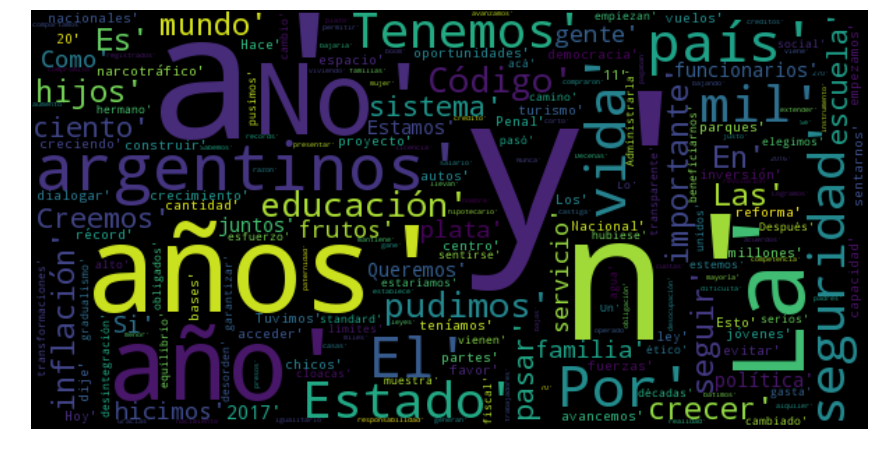

In [68]:
# simple wordcloud
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def print_wordcloud(doc_name):
  base = [ token.text for token in doc_name if token.is_stop != True and token.is_punct !=True ]
  wordcloud = WordCloud(width=600, height=300, 
                      max_font_size=150).generate(str(base))
  plt.figure(figsize=(15, 12))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()

print_wordcloud(march_doc)

In [5]:
sentence_tokenization(september_doc)

0: Queridos argentinos, qué semanas y meses hemos pasado desde abril.
1: Sé perfectamente todas las cosas que deben estar pensando y sintiendo, y las sé porque yo también lo siento.
2: Por eso voy a explicarles por qué estamos pasando lo que estamos pasando, por qué cuando parecía que veníamos bien sentimos que volvemos para atrás.
3: Y les voy a hablar desde el corazón con la verdad como siempre lo hice, y también con la convicción de que si seguimos adelante vamos a lograr esa Argentina que soñamos hace mucho, mucho tiempo.

4: ¿Se acuerdan que hace casi un año convoque, inmediatamente después de las elecciones de medio término, a los principales dirigentes de todo el país, para comprometernos en trabajar juntos en tres consensos básicos -así los llamé- sin los cuales es muy difícil que podamos crecer?
5: El primero es avanzar hacia un equilibrio de las cuentas públicas porque no podemos gastar más de lo que tenemos, hacerlo nos lleva a tener más inflación y pedir más plata prestada;

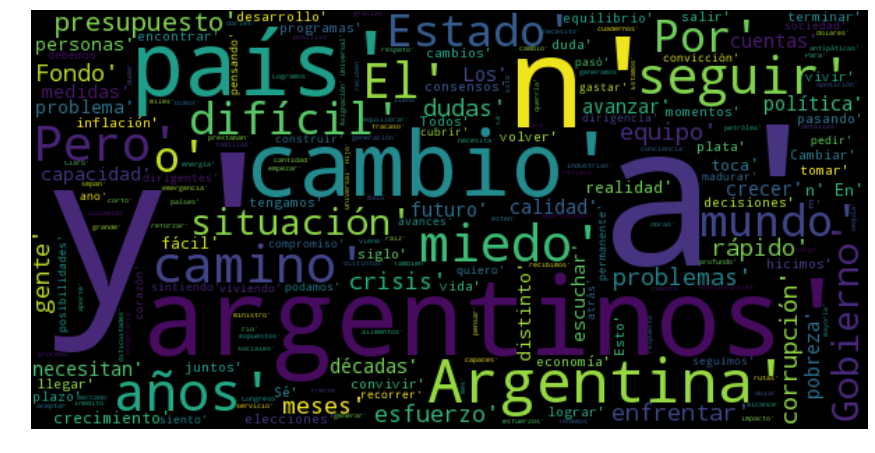

In [69]:
print_wordcloud(september_doc)

## Count Most Common Verbs, Nouns

In [0]:
# Count verbs, nouns with stopwords and remove punctuation, stops.
def count_most_common(doc_name, verb_or_noun):
  base = [ token.text for token in doc_name if token.is_stop != True and token.is_punct !=True and token.pos_ == verb_or_noun ]
  word_freq = Counter(base)
  most_common = word_freq.most_common(10)
  
  return most_common
  
march_most_common_nouns = count_most_common(march_doc, verb_or_noun = 'NOUN')
march_most_common_verbs = count_most_common(march_doc, verb_or_noun = 'VERB')

september_most_common_nouns = count_most_common(september_doc, verb_or_noun = 'NOUN')
september_most_common_verbs = count_most_common(september_doc, verb_or_noun = 'VERB')

In [7]:
data_dict = {'march_most_common_nouns':march_most_common_nouns, 'march_most_common_verbs':march_most_common_verbs,
            'september_most_common_nouns':september_most_common_nouns, 'september_most_common_verbs':september_most_common_verbs}

data_nouns_verbs = pd.DataFrame(data_dict)
data_nouns_verbs

,march_most_common_nouns,march_most_common_verbs,september_most_common_nouns,september_most_common_verbs
0,"(años, 12)","(Tenemos, 4)","(argentinos, 17)","(enfrentar, 5)"
1,"(año, 8)","(crecer, 3)","(país, 12)","(crecer, 4)"
2,"(argentinos, 7)","(pasar, 3)","(cambio, 12)","(avanzar, 4)"
3,"(país, 5)","(hicimos, 2)","(años, 9)","(necesitan, 4)"
4,"(vida, 5)","(Queremos, 2)","(camino, 8)","(toca, 4)"
5,"(educación, 4)","(construir, 2)","(miedo, 8)","(pasando, 3)"
6,"(inflación, 3)","(teníamos, 2)","(mundo, 6)","(lograr, 3)"
7,"(hijos, 3)","(Creemos, 2)","(situación, 6)","(convivir, 3)"
8,"(mundo, 3)","(acceder, 2)","(meses, 5)","(terminar, 3)"
9,"(sistema, 3)","(dije, 2)","(corrupción, 5)","(tomar, 3)"


## NLP with SpaCy – Sentiment Analysis

---
1. Using VADER.

VADER Sentiment Analysis. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

In [11]:
# adding extensions
from spacy.tokens import Doc

#!pip install nltk
import nltk
nltk.download('vader_lexicon')

#!pip install twython

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

# download and load english language into spacy
# !python -m spacy download en

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
def sentiment_scores(doc_name):
    return sent_analyzer.polarity_scores(doc_name.text)

Doc.set_extension("sentiment_analyzer",getter=sentiment_scores)

In [86]:
def sentiment_analysis_on_txt_file(input_txt, lang = 'en'):
  input_text = open(input_txt, 'r', encoding='utf-8').read()
  if lang is 'es':
    nlp = spacy.load("es_core_news_sm")
  else:
    nlp = spacy.load('en')
  input_doc = nlp(input_text)
  f = input_doc._.sentiment_analyzer
  print(input_txt)
  for k,v in f.items():
    print(k,v)
    
sentiment_analysis_on_txt_file('discurso-macri-marzo-english.txt')
print('\n')
sentiment_analysis_on_txt_file('discurso-macri-septiembre-english.txt')

discurso-macri-marzo-english.txt
neg 0.058
neu 0.86
pos 0.081
compound 0.9644


discurso-macri-septiembre-english.txt
neg 0.091
neu 0.773
pos 0.136
compound 0.9994
